# Class 11: Unsupervised Learning

## Recommended Reading
- [ISL Python Chapter 12](https://www.statlearning.com/)
- [DataCamp](https://www.datacamp.com/blog/introduction-to-unsupervised-learning)

## Overview

`Unsupervised learning` is a machine learning problem type in which training data consists of a set of input vectors but no corresponding target values. The idea behind this type of learning is to group information based on similarities, patterns, and differences.

Unlike in `supervised learning` problems, `unsupervised learning` algorithms do not require input-to-output mappings to learn a mapping function—this is what is meant when we say, “no teacher is provided to the learning algorithm.” Consequently, an unsupervised learning algorithm cannot perform classification or regression.  

The role of an unsupervised learning algorithm is to discover the underlying structure of an unlabeled dataset by itself.

### **Supervised vs Unsupervised Learning**
In the table below, we’ve compared some of the key differences between unsupervised and supervised learning:



| |Supervised Learning | Unsupervised learning|
|----------|---------------|----------|
| Objective | To approximate a function that maps inputs to outputs based out example input-output pairs. | To build a concise representation of the data and generate imaginative content from it. |
| Accuracy | Highly accurate and reliable. | Less accurate and reliable. |
| Complexity | Simpler method. | Computationally complex. |
| Classes | Number of classes is known. | Number of classes is unknown. |
| Output | A desired output value (also called the supervisory signal). | No corresponding output values.|

### Excerpt from ISL Chapter 12


In the introduction, we mentioned that unsupervised learning is a method we use to group data when no labels are present. Since no labels are present, unsupervised learning methods are typically applied to build a concise representation of the data so we can derive imaginative content from it.

For example, if we were releasing a new product, we can use unsupervised learning methods to identify who the target market for the new product will be: this is because there is no historical information about who the target customer is and their demographics.

But unsupervised learning can be broken down into two main tasks:

#### 1. Clustering
- `Exlcusive clustering`: Data is grouped such that a single data point exclusively belongs to one cluster. This would include  `K-Means`, `DB Scan`, and `T-SNE`
- `Overlapping clustering`: A soft cluster in which a single data point may belong to multiple clusters with varying degrees of membership. This would include `LDA` that we covered in the text analysis portion.
- `Hierarchical clustering`: A type of clustering in which groups are created such that similar instances are within the same group and different objects are in other groups. This would include agglomerative clustering.
- `Probalistic clustering`: Clusters are created using probability distribution


#### 2. Dimensionality reduction.  
- `Principal Component Analaysis`
- `T-SNE`
- `Non-Negative Matrix Factorization`

## Clustering

Below is a really nice visualization to demonstrate the various clustering algorithms, and the types of 2-dimensional relationships they are able to capture

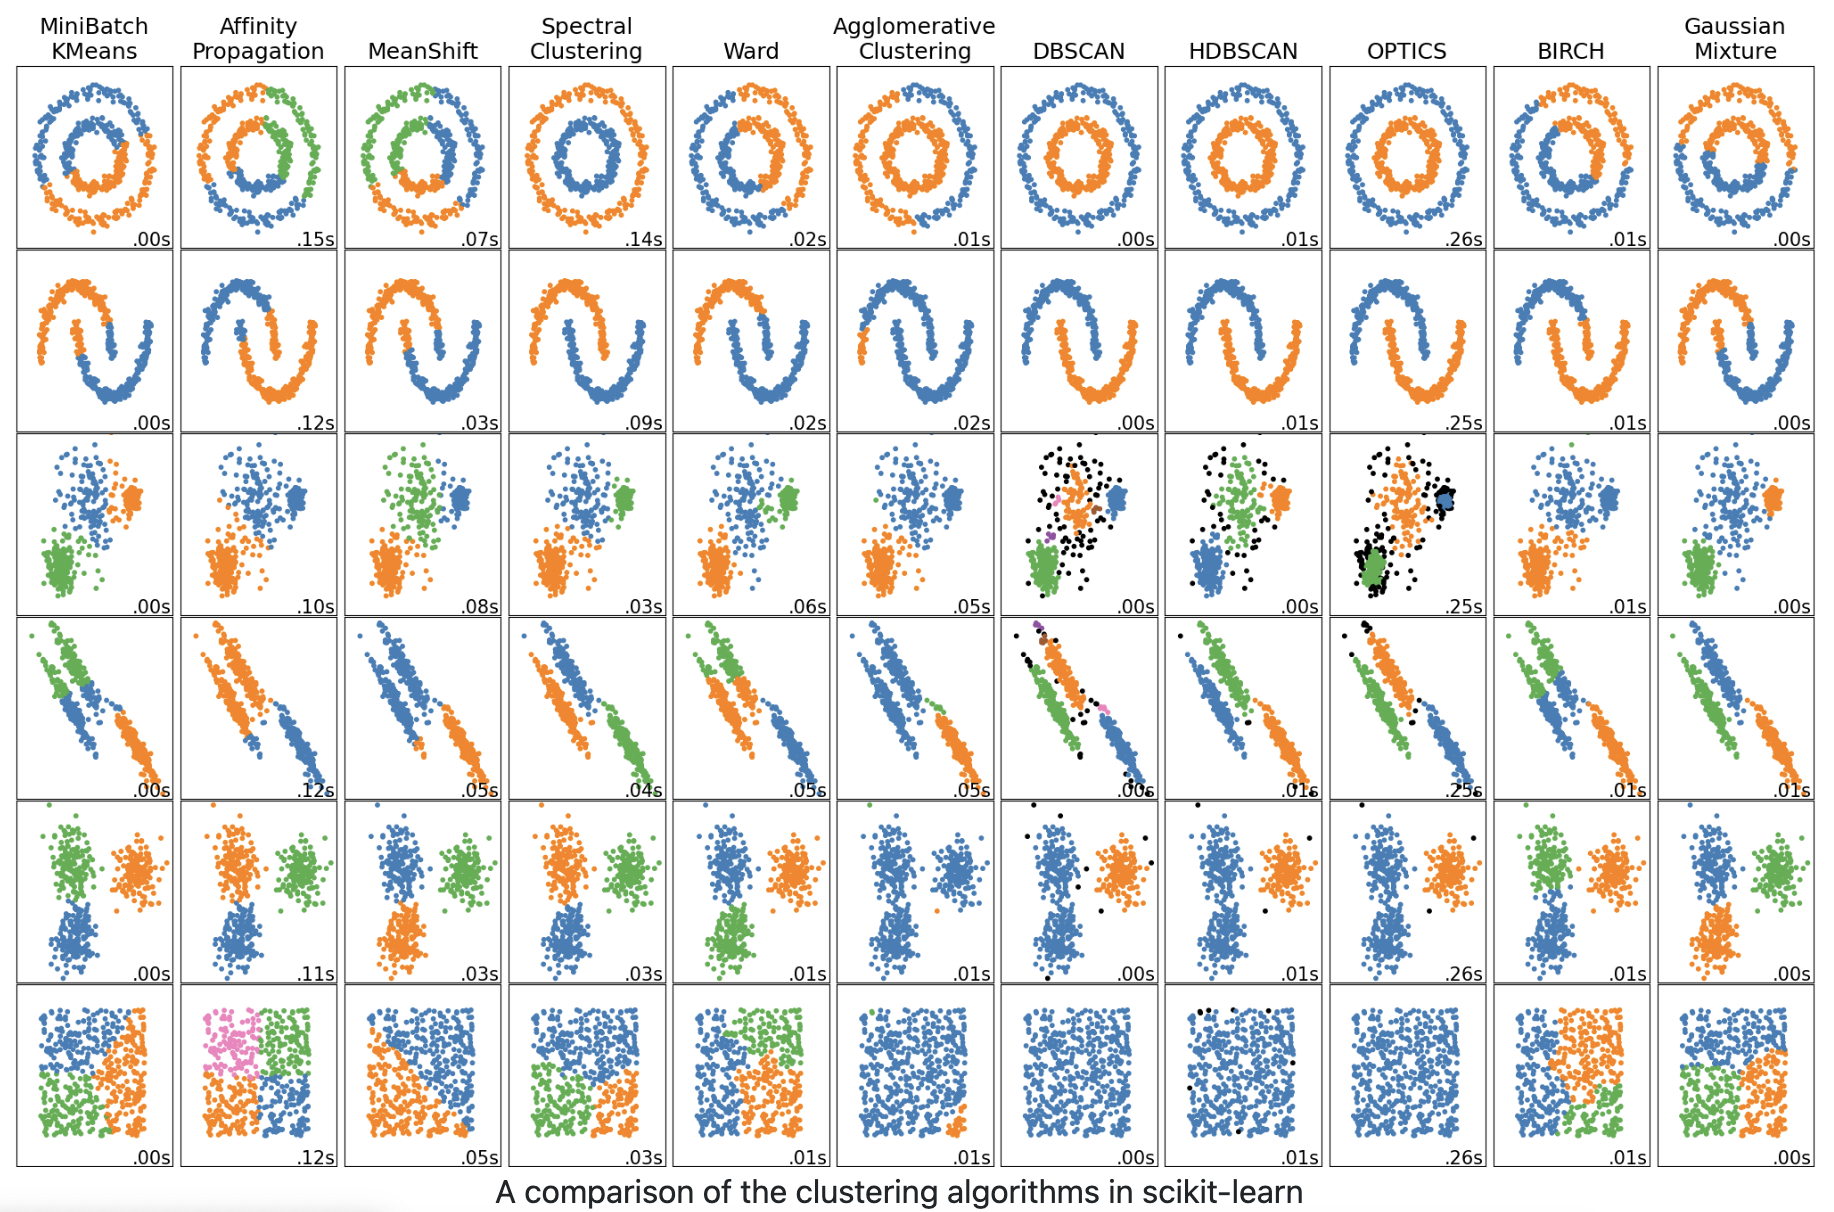

from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/e/e3/Animhorse.gif')

### K-Means  (Exclusive Clustering)

$K$-means clustering is a simple and elegant approach for partitioning a
data set into $K$ distinct, non-overlapping clusters. To perform $K$-means
clustering, we must frst specify the desired number of clusters $K$; then the
$K$-means algorithm will assign each observation to exactly one of the $K$
clusters. Figure 12.7 shows the results obtained from performing K-means
clustering on a simulated example consisting of 150 observations in two
dimensions, using three diferent values of $K$.

#### Key Facts About $K$-Means
- <font color='red'>1. Must normalize data to be on the same scale</font>
- <font color='red'>2. Need to select number of clusters</font>

#### K-Means Step by Step

In [1]:
import random
random.seed(22)

import pandas as pd
#-- Generate fake data for group 1
group_1=[]
n=30
bias = 10
for i in range(n):
    group_1.append([random.randint(0,10)+bias, random.randint(0,10)+bias])

#-- Generate fake data for group 2
group_2=[]
n=30
bias = 20
for i in range(n):
    group_2.append([random.randint(0,10)+bias, random.randint(0,10)+bias])

df_g1 = pd.DataFrame(group_1, columns=["x", "z"])
df_g1["group"] = 1
df_g2 = pd.DataFrame(group_2, columns=["x", "z"])
df_g2["group"] = 2

df = pd.concat([df_g1, df_g2], axis=0)

print(df.sample(4))

     x   z  group
4   15  11      1
26  16  14      1
29  27  20      2
15  18  19      1


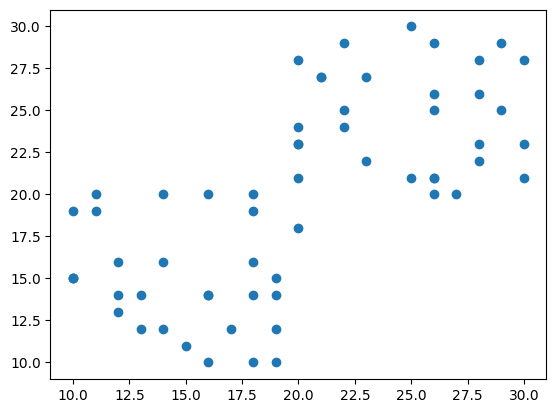

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x=df["x"], y=df["z"])
plt.show()

##### Step #1 - generate random seeds for starting centroids with k=2

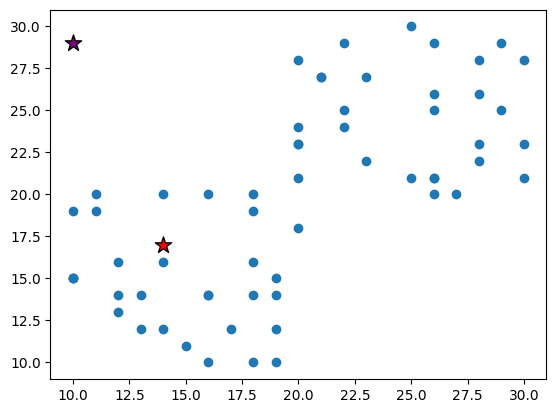

<ipython-input-3-d75093209581>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["nearest_centroid"] = df["nearest_centroid"].fillna(2)


,x,z,group,Distance from C1,Distance from C2,nearest_centroid
25,30,21,2,16.492423,21.540659,1
7,19,12,1,7.071068,19.235384,1
4,15,11,1,6.082763,18.681542,1
11,26,26,2,15.000000,16.278821,1
16,10,15,1,4.472136,14.000000,1


In [3]:
random.seed(22)
c1_color = "red"
c2_color = "purple"

centroid1 = [random.randint(df["x"].min(),df["x"].max(),), random.randint(df["z"].min(),df["z"].max())]
centroid2 = [random.randint(df["x"].min(),df["x"].max()), random.randint(df["z"].min(),df["z"].max())]
plt.scatter(x=df["x"], y=df["z"])
plt.scatter(centroid1[0],centroid1[1], marker='*', c=c1_color, s=150,edgecolors='black')
plt.scatter(centroid2[0],centroid2[1], marker='*', c=c2_color, s=150,edgecolors='black')
plt.show()

df["Distance from C1"] = ((df["x"] - centroid1[0])**2 + (df["z"] - centroid1[1])**2)**(1/2)
df["Distance from C2"] = ((df["x"] - centroid2[0])**2 + (df["z"] - centroid2[1])**2)**(1/2)
df["nearest_centroid"] = None
df.loc[df["Distance from C1"] <= df["Distance from C2"], "nearest_centroid"] = 1
df["nearest_centroid"] = df["nearest_centroid"].fillna(2)

df.sample(5)

##### Step 2: Label datapoints according to nearest centroid

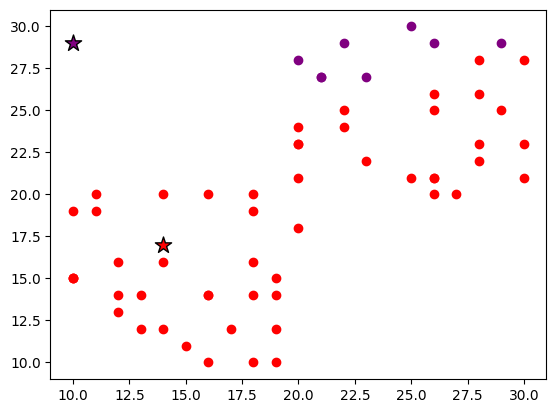

In [ ]:
plt.scatter(x=df.loc[df["nearest_centroid"]==1, "x"], y=df.loc[df["nearest_centroid"]==1, "z"], color=c1_color)
plt.scatter(x=df.loc[df["nearest_centroid"]==2, "x"], y=df.loc[df["nearest_centroid"]==2, "z"], color=c2_color)
plt.scatter(centroid1[0],centroid1[1], marker='*', c=c1_color, s=150,edgecolors='black')
plt.scatter(centroid2[0],centroid2[1], marker='*', c=c2_color, s=150,edgecolors='black')
plt.show()

##### Step 3: Move Centroids to Average of all In-Cluster Points

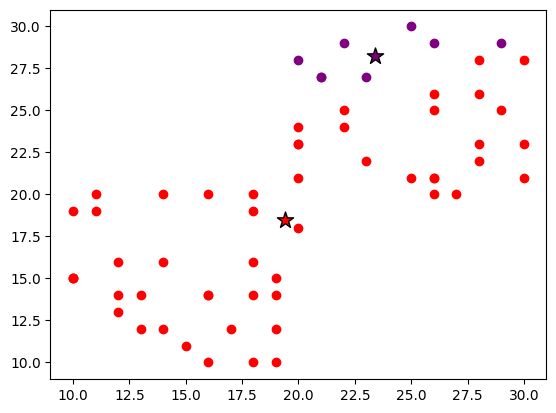

In [4]:
centroid1 = [df.loc[df["nearest_centroid"]==1, "x"].mean(), df.loc[df["nearest_centroid"]==1, "z"].mean()]
centroid2 = [df.loc[df["nearest_centroid"]==2, "x"].mean(), df.loc[df["nearest_centroid"]==2, "z"].mean()]
plt.scatter(x=df.loc[df["nearest_centroid"]==1, "x"], y=df.loc[df["nearest_centroid"]==1, "z"], color=c1_color)
plt.scatter(x=df.loc[df["nearest_centroid"]==2, "x"], y=df.loc[df["nearest_centroid"]==2, "z"], color=c2_color)
plt.scatter(centroid1[0],centroid1[1], marker='*', c=c1_color, s=150,edgecolors='black')
plt.scatter(centroid2[0],centroid2[1], marker='*', c=c2_color, s=150,edgecolors='black')
plt.show()

##### Step 4: Repeat Step 2 - relabel datapoints based on new centroids


In [6]:
df.sample(5)

,x,z,group,Distance from C1,Distance from C2,nearest_centroid
10,25,21,2,6.154597,7.429881,1
25,18,10,1,8.593056,19.025066,1
3,20,24,2,5.553432,5.427073,2
12,14,16,1,5.928600,15.425729,1
6,28,26,2,11.435195,5.143260,2


<ipython-input-7-8420d83f7d51>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["nearest_centroid"] = df["nearest_centroid"].fillna(2)


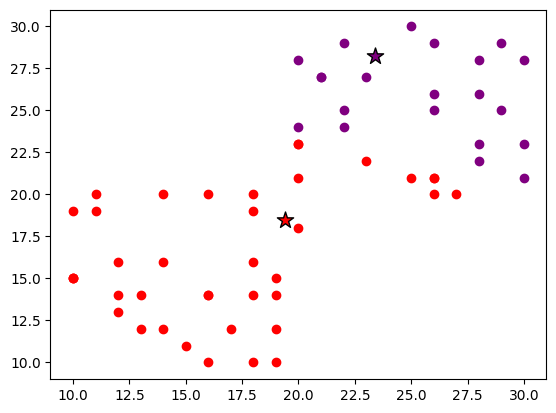

In [7]:
df["Distance from C1"] = ((df["x"] - centroid1[0])**2 + (df["z"] - centroid1[1])**2)**(1/2)
df["Distance from C2"] = ((df["x"] - centroid2[0])**2 + (df["z"] - centroid2[1])**2)**(1/2)
df["nearest_centroid"] = None
df.loc[df["Distance from C1"] <= df["Distance from C2"], "nearest_centroid"] = 1
df["nearest_centroid"] = df["nearest_centroid"].fillna(2)

plt.scatter(x=df.loc[df["nearest_centroid"]==1, "x"], y=df.loc[df["nearest_centroid"]==1, "z"], color=c1_color)
plt.scatter(x=df.loc[df["nearest_centroid"]==2, "x"], y=df.loc[df["nearest_centroid"]==2, "z"], color=c2_color)
plt.scatter(centroid1[0],centroid1[1], marker='*', c=c1_color, s=150,edgecolors='black')
plt.scatter(centroid2[0],centroid2[1], marker='*', c=c2_color, s=150,edgecolors='black')
plt.show()

##### Step 5: Repeat step 3, move Centroids to Average of all In-Cluster Points

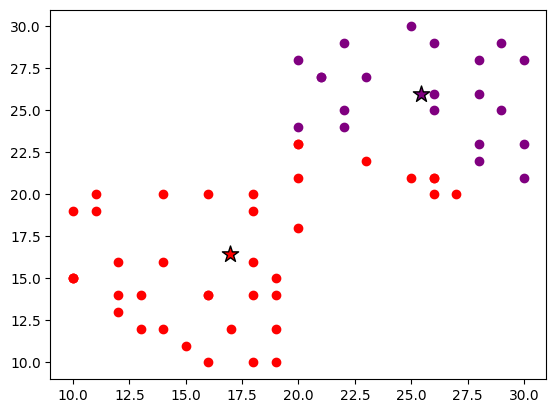

In [8]:
centroid1 = [df.loc[df["nearest_centroid"]==1, "x"].mean(), df.loc[df["nearest_centroid"]==1, "z"].mean()]
centroid2 = [df.loc[df["nearest_centroid"]==2, "x"].mean(), df.loc[df["nearest_centroid"]==2, "z"].mean()]
plt.scatter(x=df.loc[df["nearest_centroid"]==1, "x"], y=df.loc[df["nearest_centroid"]==1, "z"], color=c1_color)
plt.scatter(x=df.loc[df["nearest_centroid"]==2, "x"], y=df.loc[df["nearest_centroid"]==2, "z"], color=c2_color)
plt.scatter(centroid1[0],centroid1[1], marker='*', c=c1_color, s=150,edgecolors='black')
plt.scatter(centroid2[0],centroid2[1], marker='*', c=c2_color, s=150,edgecolors='black')
plt.show()

##### Step 6: Repeat Step 2 - relabel datapoints based on new centroids


<ipython-input-9-8420d83f7d51>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["nearest_centroid"] = df["nearest_centroid"].fillna(2)


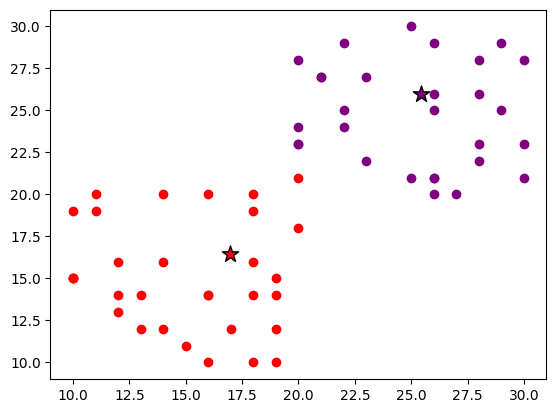

In [9]:
df["Distance from C1"] = ((df["x"] - centroid1[0])**2 + (df["z"] - centroid1[1])**2)**(1/2)
df["Distance from C2"] = ((df["x"] - centroid2[0])**2 + (df["z"] - centroid2[1])**2)**(1/2)
df["nearest_centroid"] = None
df.loc[df["Distance from C1"] <= df["Distance from C2"], "nearest_centroid"] = 1
df["nearest_centroid"] = df["nearest_centroid"].fillna(2)

plt.scatter(x=df.loc[df["nearest_centroid"]==1, "x"], y=df.loc[df["nearest_centroid"]==1, "z"], color=c1_color)
plt.scatter(x=df.loc[df["nearest_centroid"]==2, "x"], y=df.loc[df["nearest_centroid"]==2, "z"], color=c2_color)
plt.scatter(centroid1[0],centroid1[1], marker='*', c=c1_color, s=150,edgecolors='black')
plt.scatter(centroid2[0],centroid2[1], marker='*', c=c2_color, s=150,edgecolors='black')
plt.show()

### Applying K-Means in the SKlearn Universe

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

The estimator `sklearn.cluster.KMeans()`  performs $K$-means clustering in
`Python`.  We begin with a simple simulated example in which there
truly are two clusters in the data: the first 25 observations have a
mean shift relative to the next 25 observations.

In [14]:
np.random.seed(0)
X = np.random.standard_normal((50,2))
X[:25,0] += 3
X[:25,1] -= 4

In [15]:
X.shape

(50, 2)

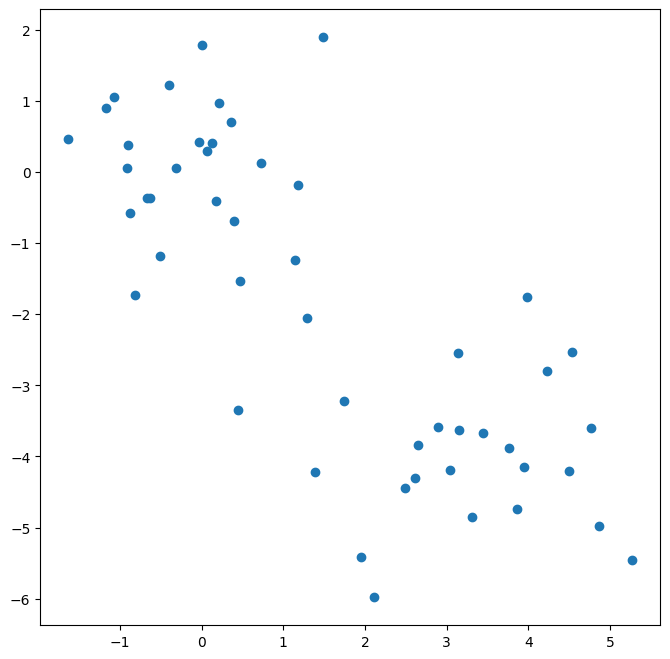

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1])


We now perform $K$-means clustering with $K=2$.


In [17]:
kmeans = KMeans(n_clusters=2,
                random_state=765,
                n_init=20).fit(X)


We specify `random_state` to make the results reproducible.  The cluster assignments of the 50 observations are contained in `kmeans.labels_`.

In [18]:
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

The $K$-means clustering perfectly separated the observations into two
clusters even though we did not supply any group information to
`KMeans()`. We can plot the data, with each observation
colored according to its cluster assignment.

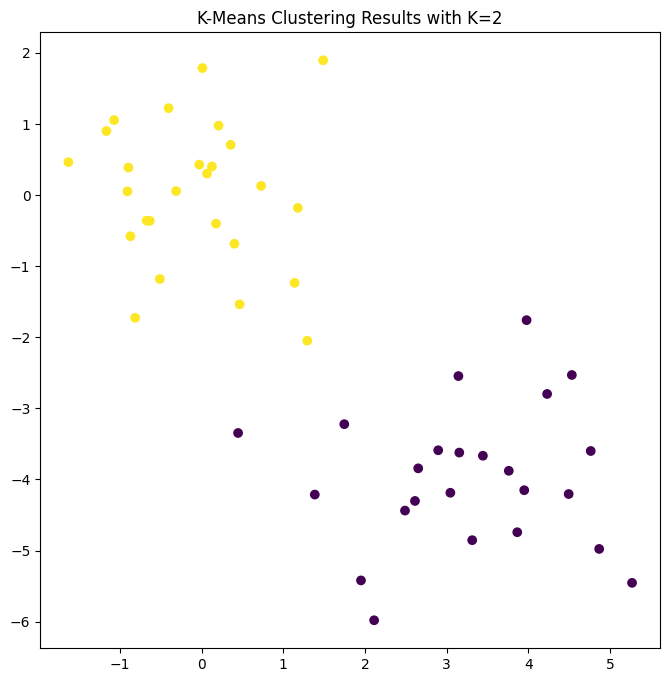

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");


### Application of K-Means

In [19]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [21]:
df.shape

(178, 13)

In [20]:
df = load_wine(as_frame=True)
df = pd.DataFrame(data= np.c_[df['data'], df['target']],
                     columns= df['feature_names'] + ['target'])
df = df.drop(columns=['target'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
df.shape

(178, 13)

In [22]:
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [28]:
model =  KMeans(n_clusters = 5, random_state = 42)
cluster_labels = model.fit_predict(features)
print(cluster_labels[0:10])

[4 4 4 4 2 4 4 2 4 4]


In [29]:
pd.Series(cluster_labels).value_counts()

,count
1,49
3,43
4,35
0,27
2,24


Below is for purposes of visualization, we will come back to PCA in the next section

Text(0.5, 1.0, 'K-Means Clustering Results with K=3')

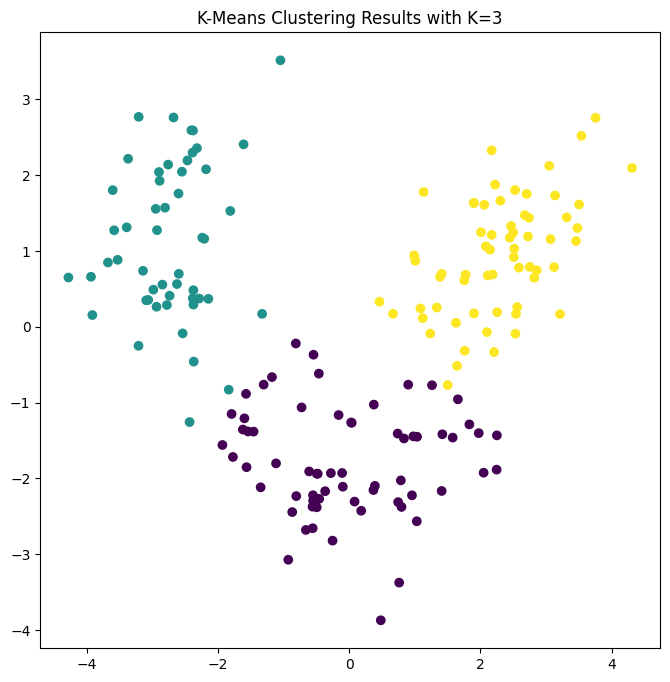

In [25]:
from sklearn.decomposition import PCA
dims = PCA(n_components=2)
pca_dims = dims.fit_transform(features)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(pca_dims[:,0], pca_dims[:,1], c=cluster_labels)
ax.set_title("K-Means Clustering Results with K=3")


In [27]:
sse[0:5]

[2313.9999999999986,
 1659.9511977619795,
 1277.928488844643,
 1180.6960041746115,
 1145.4161793820294]

In [26]:
sse = []
for k in range(1, 25):
    print(k)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


### Determining Number of Clusters with Elbow Plot
The elbow method is the way to decide this. In this method, we plot the Sum Squared Error (SSE) with respect to the number of clusters.

SSE is the sum of the squared distances of all samples from the centroid of their clusters. SSE will be the lowest in any dataset if the number of clusters equals the number of data samples (Think!)

In [ ]:
sse

[2314.0,
 1659.0079672511501,
 1277.9284888446423,
 1183.368488130879,
 1101.8347681678697,
 1046.6269333239838,
 991.5648407079043,
 950.4627199829325,
 891.7118770844721,
 849.5145346130844,
 813.279937387421,
 798.0541298606188,
 761.7780701508314,
 738.4350122319418,
 718.3506183234515,
 691.1997269827668,
 684.5083519717016,
 669.2341956192544,
 646.9636865525695,
 630.1241910557468,
 606.5210896676078,
 593.9634748665515,
 583.0194742683033,
 569.7680423323204]

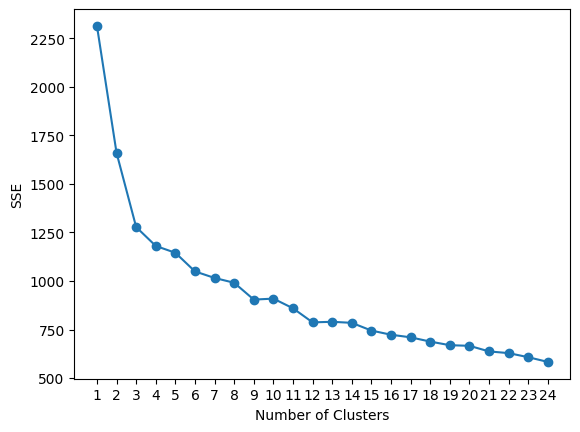

In [ ]:
plt.plot(range(1, 25), sse, marker='o')
plt.xticks(range(1, 25))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### EDA to explain clusters

In [32]:
import seaborn as sns

In [31]:
df['cluster_label'] = pd.Series(cluster_labels)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster_label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,4
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,4
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,4
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,4
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


<Axes: xlabel='cluster_label', ylabel='color_intensity'>

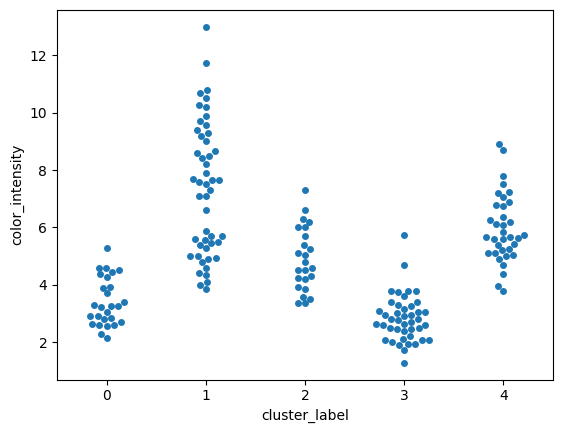

In [33]:
sns.swarmplot(data=df, x="cluster_label", y="color_intensity")


<Axes: xlabel='cluster_label', ylabel='hue'>

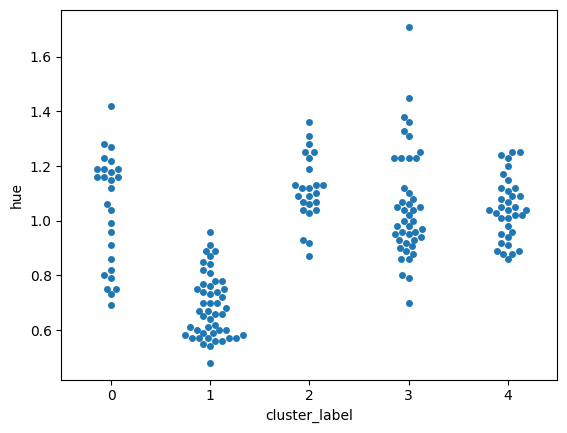

In [34]:
sns.swarmplot(data=df, x="cluster_label", y="hue")


## Dimension Reduction - Why use 20 variables, when you only need 3?

In [ ]:
from sklearn.decomposition import PCA

Popular algorithms used for dimensionality reduction include `principal component analysis (PCA)` and `Singular Value Decomposition (SVD)`. These algorithms seek to transform data from high-dimensional spaces to low-dimensional spaces without compromising meaningful properties in the original data. These techniques are typically deployed during exploratory data analysis (EDA) or data processing to prepare the data for modeling.

It’s helpful to reduce the dimensionality of a dataset during EDA to help visualize data: this is because visualizing data in more than three dimensions is difficult. From a data processing perspective, reducing the dimensionality of the data simplifies the modeling problem.

When more input features are being fed into the model, the model must learn a more complex approximation function. This phenomenon can be summed up by a saying called the “curse of dimensionality.”

- `Feature Selection`
- Dealing with high `multicollinearity`
- Data compression
- Data visualization in high domensional data


### Principal Component Analysis

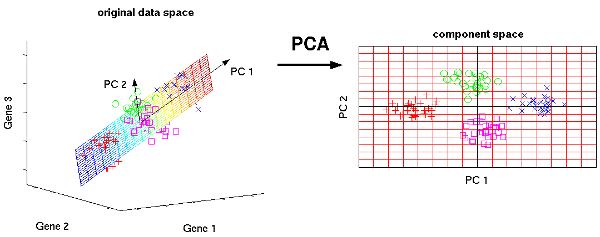

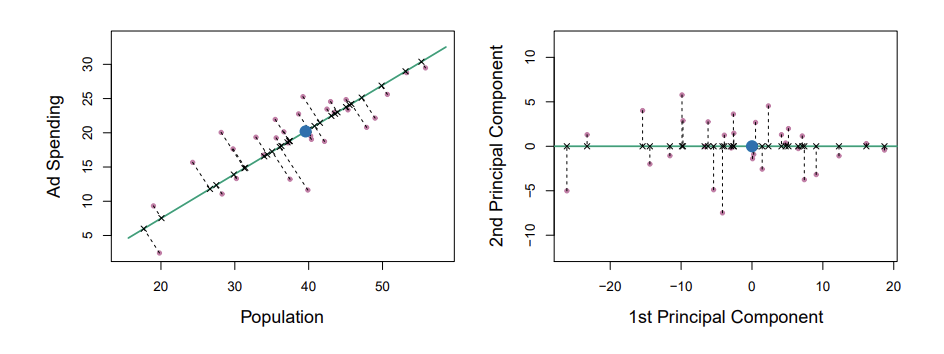

A subset of the advertising data. The mean pop and ad budgets
are indicated with a blue circle. Left: The frst principal component direction is shown in green. It is the `dimension along which the data vary the most`, and it also defnes the line that is closest to all n of the observations. The distances from each observation to the principal component are represented using the black dashed line segments. The blue dot represents (pop, ad). Right: The left-hand panel has been rotated so that the frst principal component direction coincides with the x-axis.

- <font color='red'>1. Must normalize data to be on the same scale</font>
- <font color='red'>2. Works only on continuous numeric data, some variants of PCA exist for dummy variables</font>

### How it works (at a high level)

1. Normalize/Standardize data (make sure everything is on the same scale)
2. Calculate covariance matrix
3. Calculate eigenvectors/eigenvalues
4. Iteratively decide on number of desired `principal components` (usually with a desired variance explained

### Projecting the Direction of Variance

To see what these numbers mean, let's visualize them as vectors over the input data, using the components to define the direction of the vector and the explained variance to define the squared length of the vector (see the following figure):

In [35]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

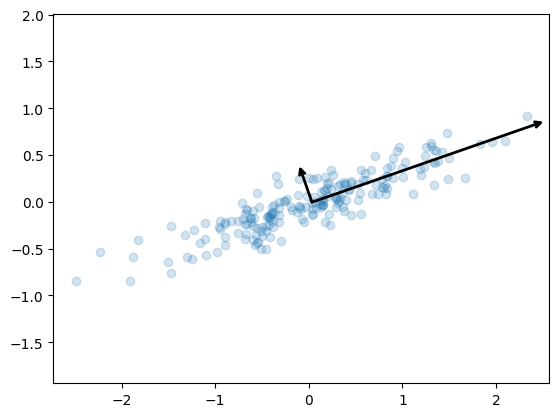

In [36]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2)
pca.fit(X)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [37]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [38]:
df = load_wine(as_frame=True)
df = pd.DataFrame(data= np.c_[df['data'], df['target']],
                     columns= df['feature_names'] + ['target'])
df = df.drop(columns=['target'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [39]:
df.shape

(178, 13)

In [ ]:
df.shape

(178, 13)

In [40]:
from sklearn.decomposition import PCA

In [41]:
scaler =StandardScaler()
features = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [42]:
from sklearn.decomposition import PCA
dims = PCA(n_components=2)
pca_dims = dims.fit_transform(features)

In [44]:
pd.DataFrame(pca_dims).head()

,0,1
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


Text(0.5, 1.0, 'PCA with 2 Dimensions')

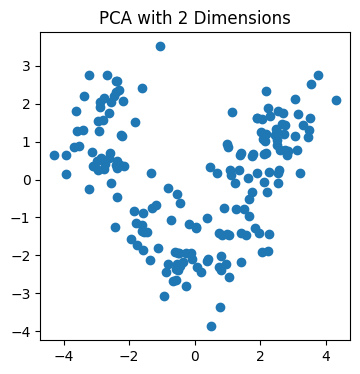

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(pca_dims[:,0], pca_dims[:,1])
ax.set_title("PCA with 2 Dimensions")


### Choosing the Number of Components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components (see the following figure):

In [46]:
features.shape

(178, 13)

In [47]:
features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
my_model.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

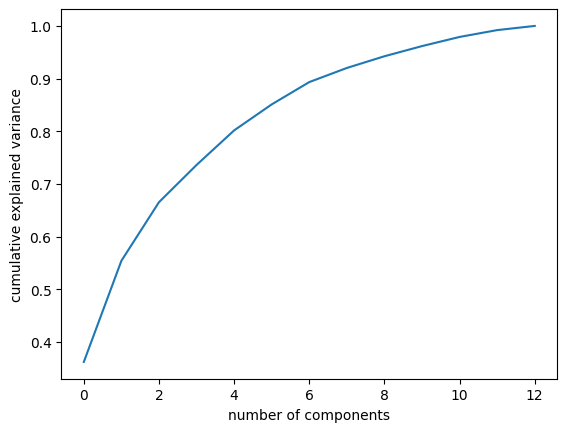

In [48]:
my_model = PCA(n_components=13)
my_model.fit_transform(features)

plt.plot(my_model.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [50]:
df__ = pd.DataFrame(my_model.fit_transform(features))
df__

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416,0.146097,0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894,0.552427,0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235,-0.047024,-0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975,-0.390829,-0.057448,0.491490,0.299822,0.339821,-0.021866


This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits data the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

This tells us that our 2-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in its features.